In [51]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
from geopandas.tools import overlay
from shapely.geometry import Point
from shapely.geometry import mapping
import shapely.speedups
import matplotlib.pyplot as plt
import timeit

# change default figsize 
plt.rcParams['figure.figsize'] = (15, 15)

In [2]:
lines = gpd.read_file('https://www.chapelhillopendata.org/api/v2/catalog/datasets/chapel-hill-bike-map-lines/exports/geojson')
bicycles = gpd.read_file('https://www.chapelhillopendata.org/api/v2/catalog/datasets/bicycle-crash-data-chapel-hill-region/exports/geojson')


In [3]:
print(lines.crs, bicycles.crs)

{'init': 'epsg:4326'} {'init': 'epsg:4326'}


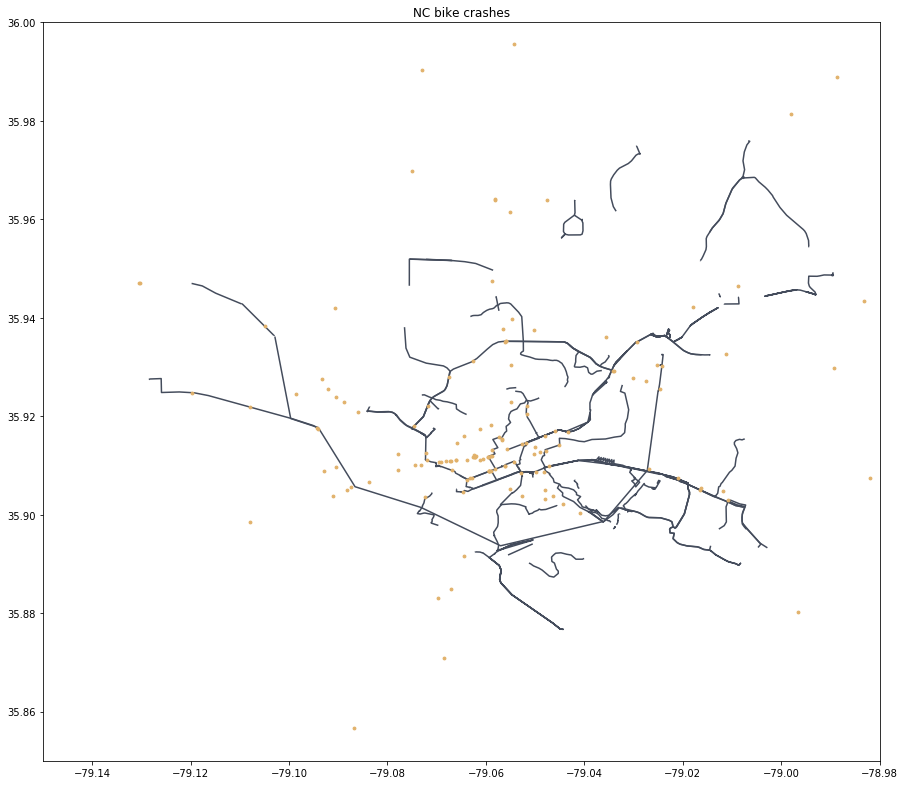

In [9]:
fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

lines.plot(ax=ax, color='#444C5C', zorder=0);
bicycles.plot(ax=ax, color='#E1B16A', zorder=1, markersize=8);

ax.set(xlim=(-79.15,-78.98), ylim=(35.85,36.0));

In [32]:
print(lines.crs, bicycles.crs)

{'init': 'epsg:4326'} {'init': 'epsg:4326'}


In [33]:
lines_4269 = lines.to_crs('+init=epsg:4269')

bikes_4269 = bicycles.to_crs('+init=epsg:4269')

In [36]:
print(lines_4269.crs, bikes_4269.crs)

+init=epsg:4269 +init=epsg:4269


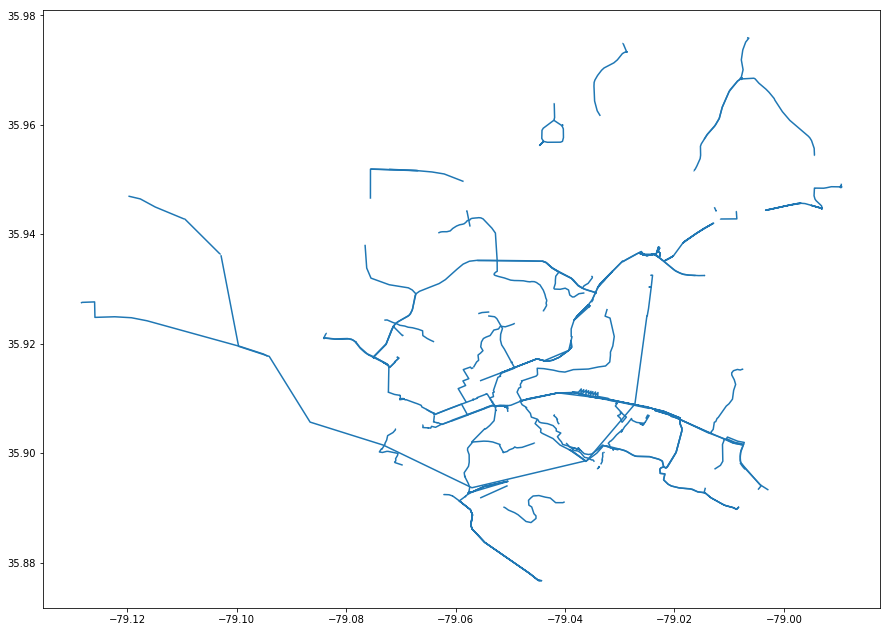

In [41]:
lines_4269.plot();

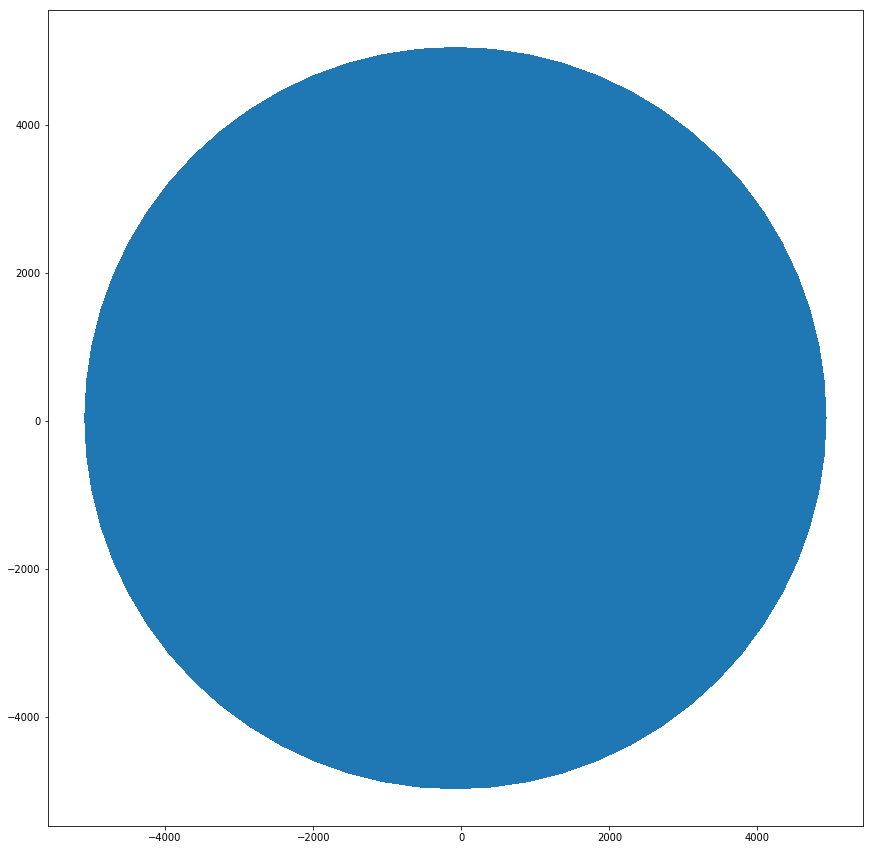

In [45]:
bikes_4269['geometry']= bikes_4269.buffer(0.001)
bikes_4269.plot()

ax.set(xlim=(-79.15,-78.98), ylim=(35.85,36.0));

In [54]:
lines_inter = gpd.overlay(bikes_4269, lines_4269, how='intersection')

lines_inter.plot(alpha=0.5, edgecolor='k', cmap='tab10');

TypeError: overlay only takes GeoDataFrames with (multi)polygon  geometries.